In [69]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end,auto_adjust=False)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company.columns=company.columns.droplevel(1)
    company["company_name"] = com_name
    
    
df = pd.concat(company_list, axis=0)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
df

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Date,,,,,,,
2024-07-08,226.759521,227.820007,227.850006,223.250000,227.089996,59085900,APPLE
2024-07-09,227.615509,228.679993,229.399994,226.369995,227.929993,48076100,APPLE
2024-07-10,231.895508,232.979996,233.080002,229.250000,229.300003,62627700,APPLE
2024-07-11,226.510696,227.570007,232.389999,225.770004,231.389999,64710600,APPLE
2024-07-12,229.466843,230.539993,232.639999,228.679993,228.919998,53046500,APPLE
...,...,...,...,...,...,...,...
2025-06-30,219.389999,219.389999,223.820007,219.119995,223.520004,58887800,AMAZON
2025-07-01,220.460007,220.460007,221.880005,217.929993,219.500000,39256800,AMAZON
2025-07-02,219.919998,219.919998,221.600006,219.059998,219.729996,30894200,AMAZON


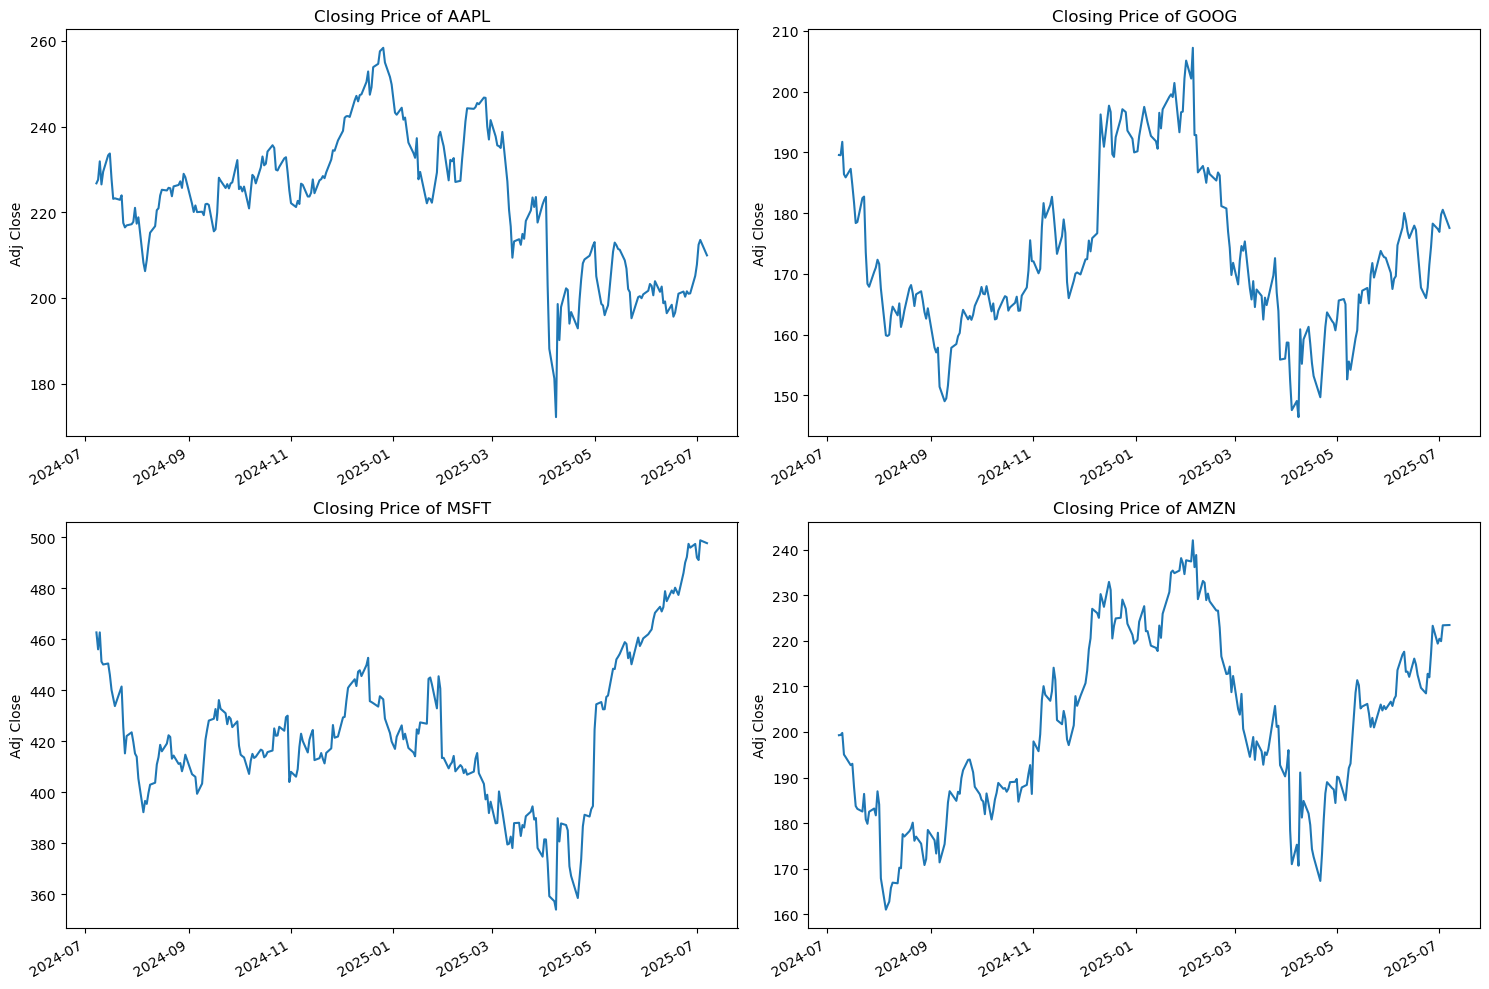

In [53]:
plt.figure(figsize=(15, 10),linewidth=50)
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

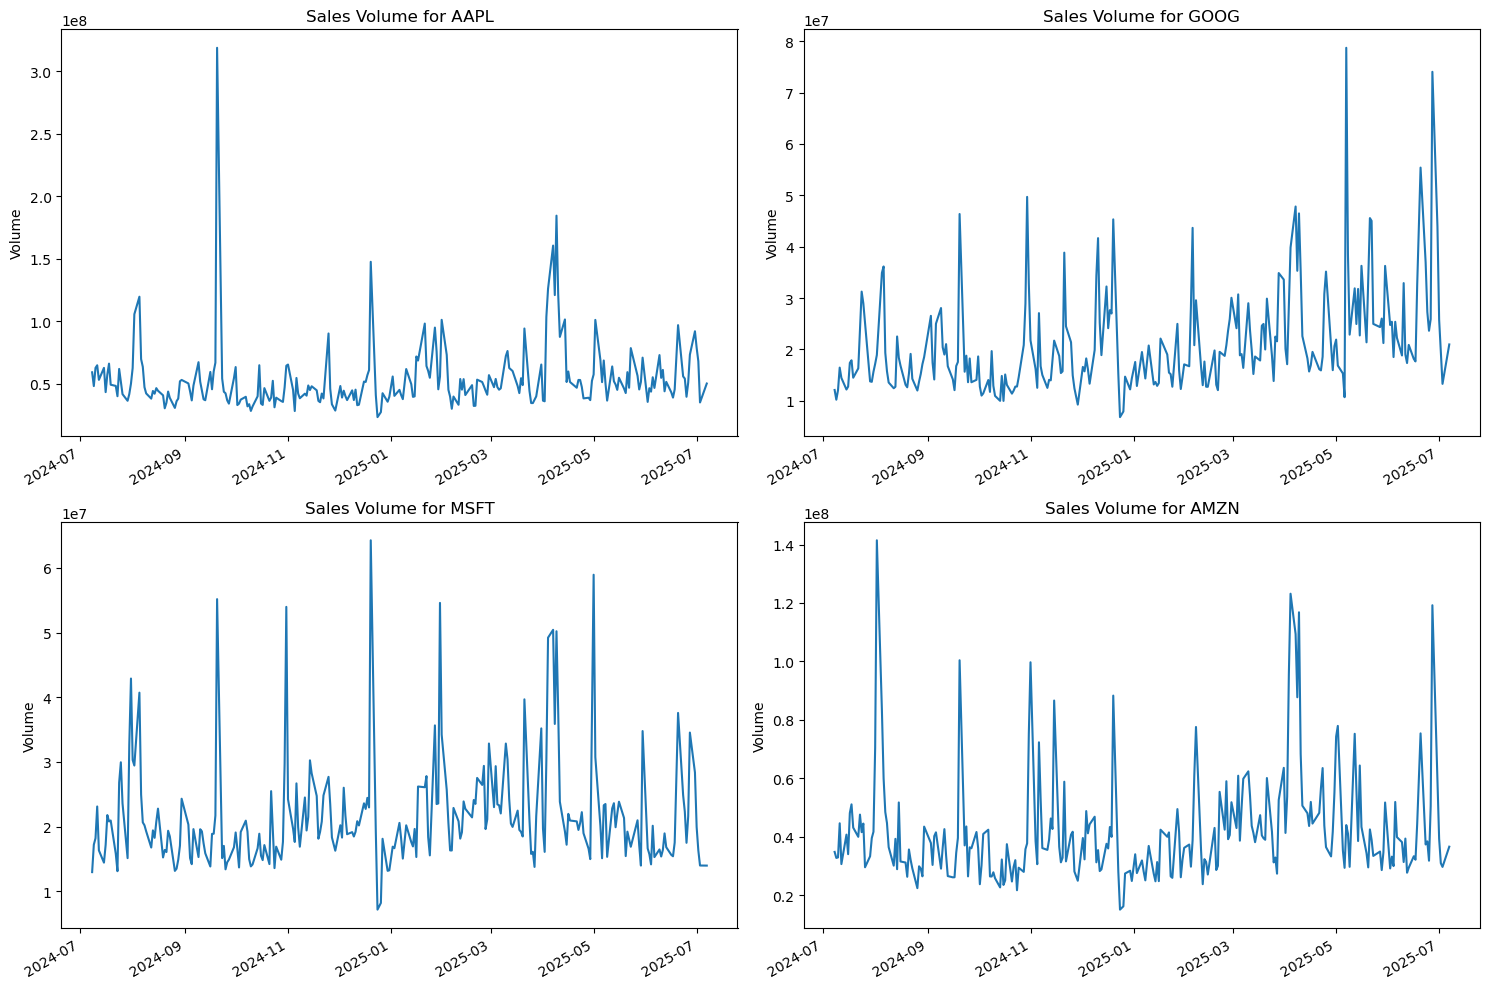

In [54]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

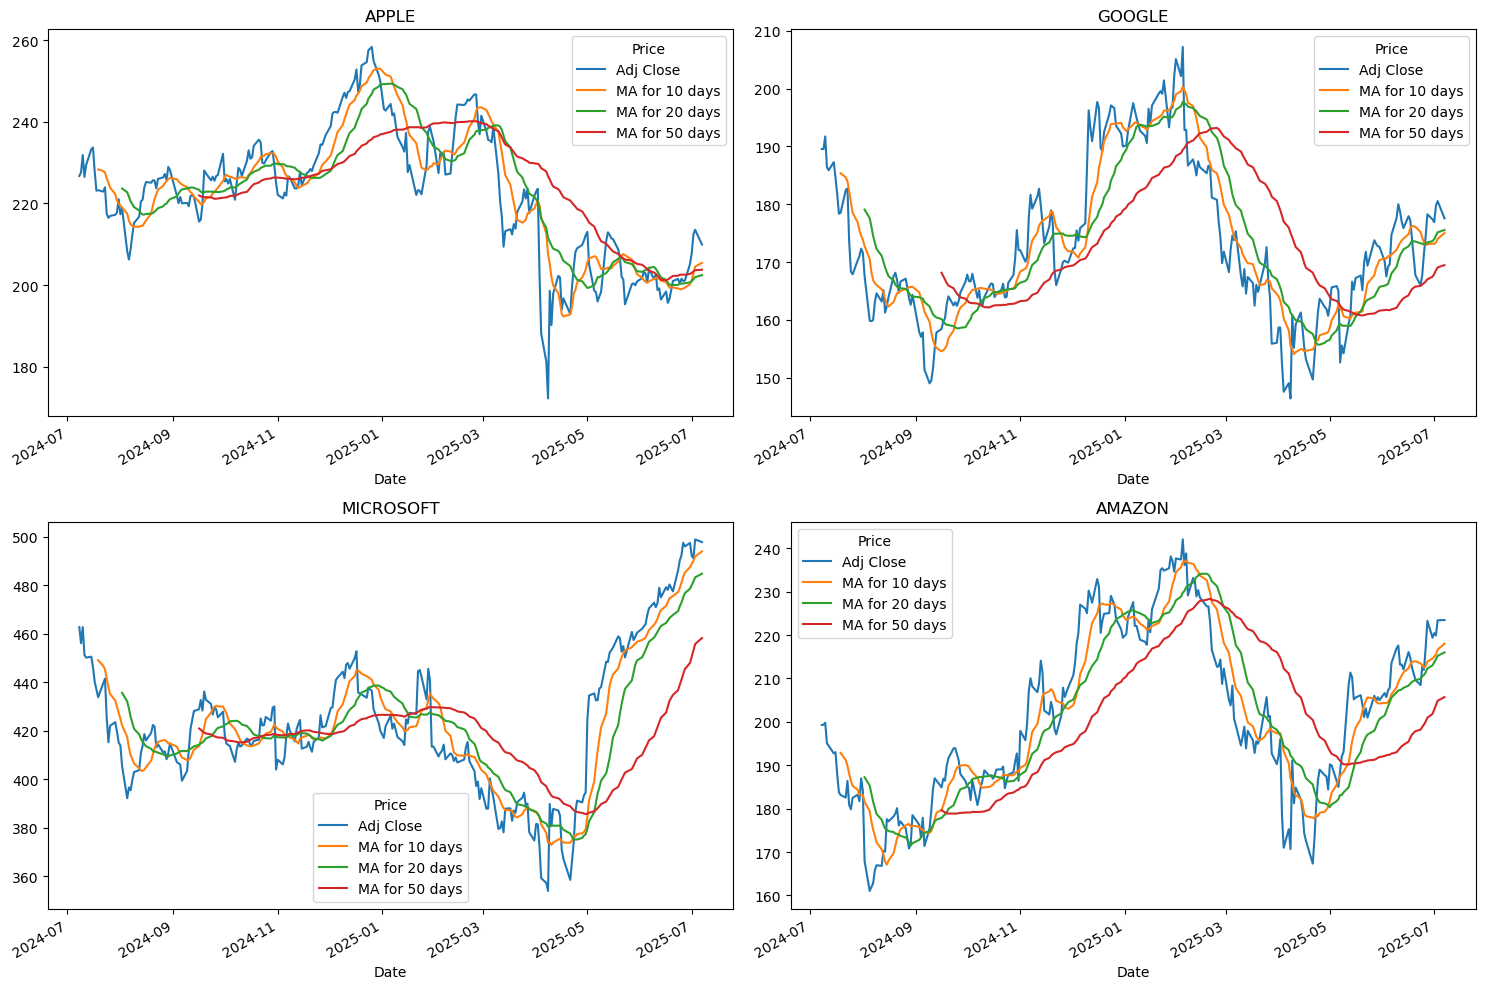

In [55]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

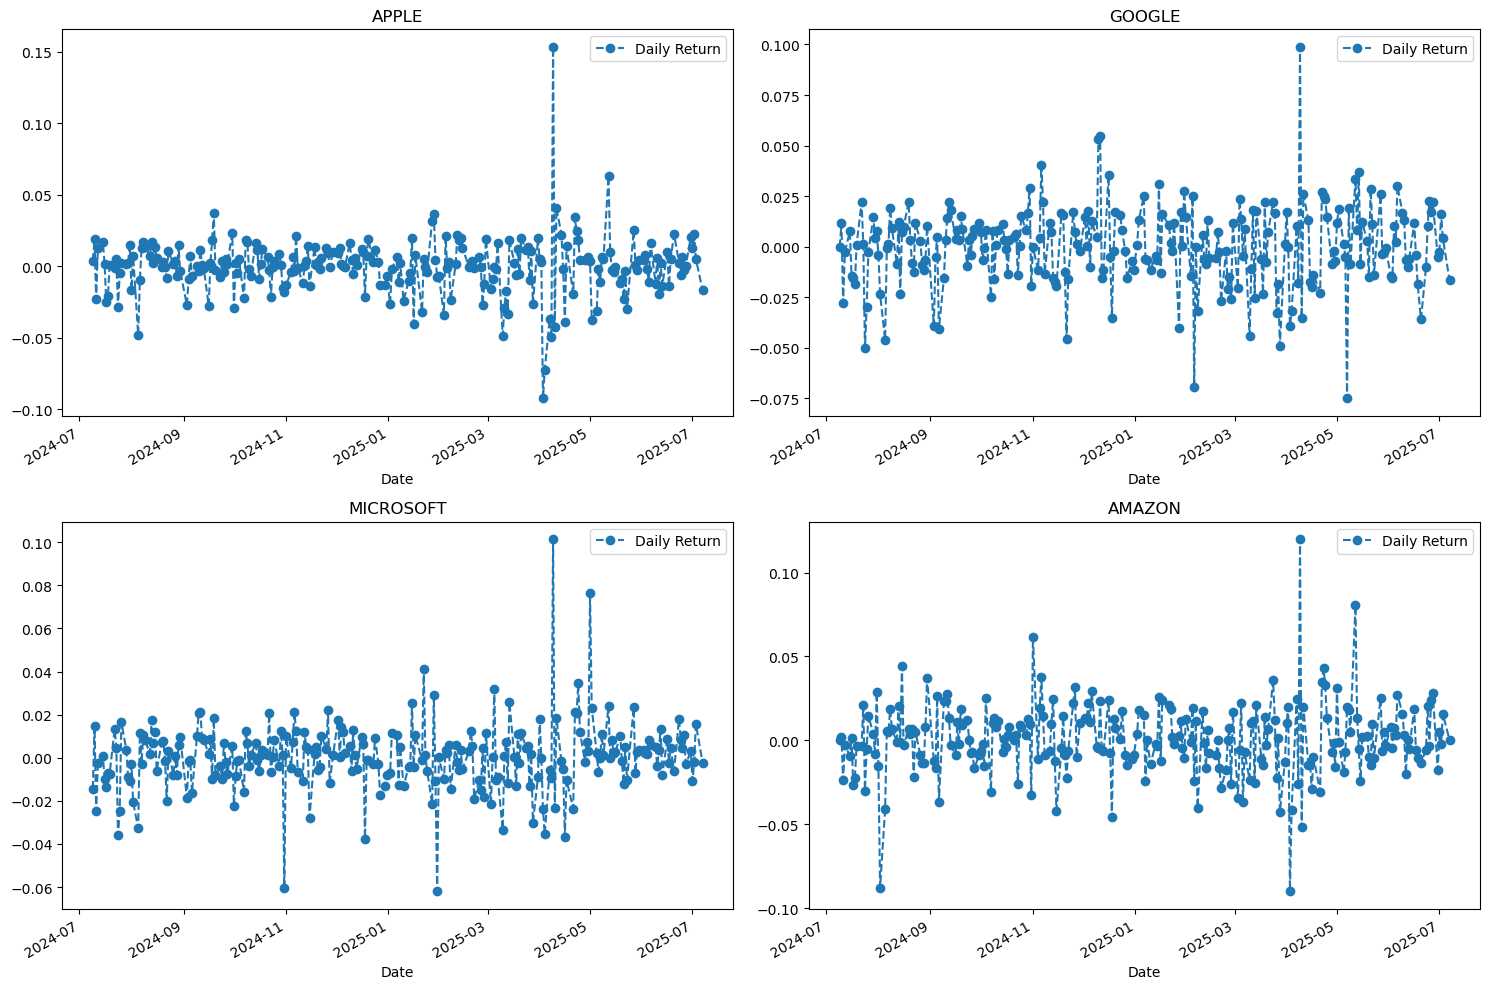

In [56]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

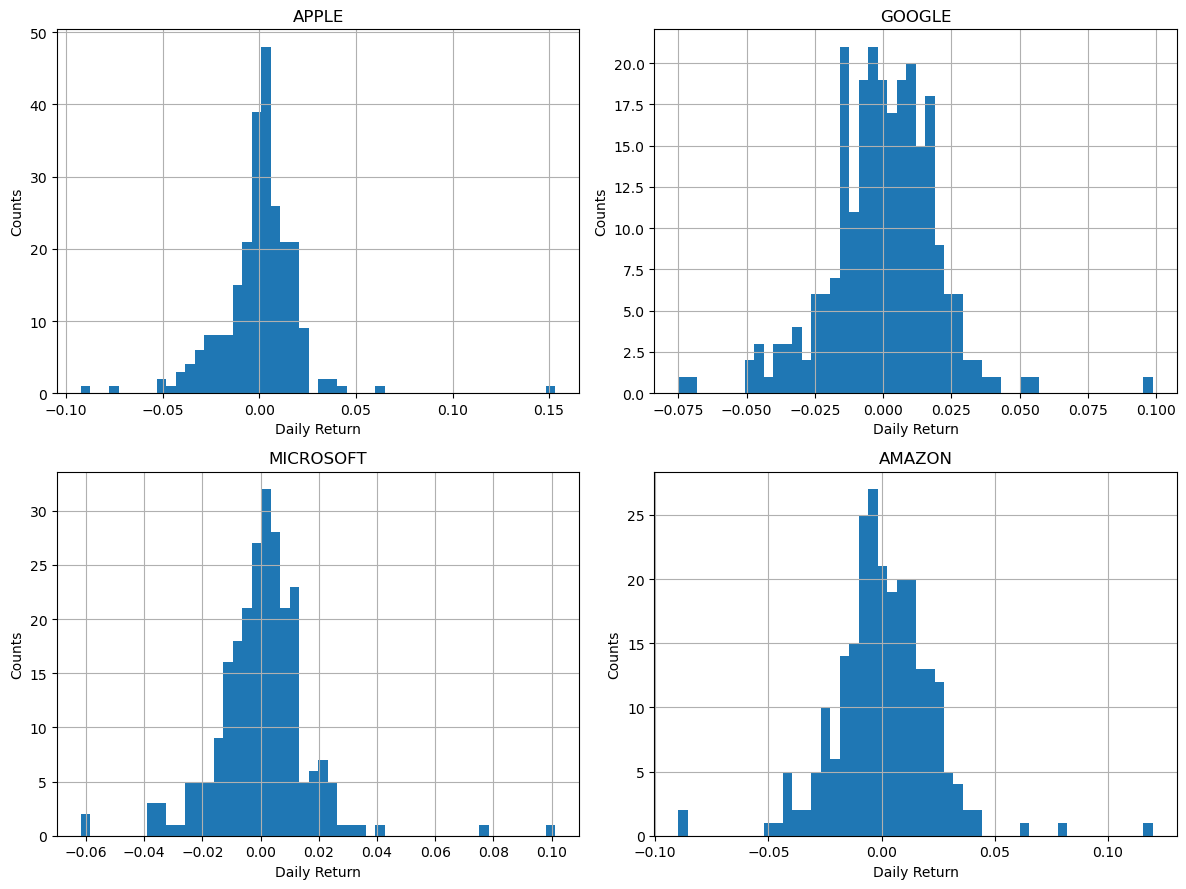

In [57]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [67]:
closing_df = yf.download(tech_list, start=start, end=end,auto_adjust=False)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-08,NaN,NaN,NaN,NaN
2024-07-09,0.003775,0.000251,-0.000210,-0.014370
2024-07-10,0.018804,0.002257,0.011657,0.014602
2024-07-11,-0.023221,-0.023725,-0.027821,-0.024772
2024-07-12,0.013051,-0.002871,-0.002776,-0.002529


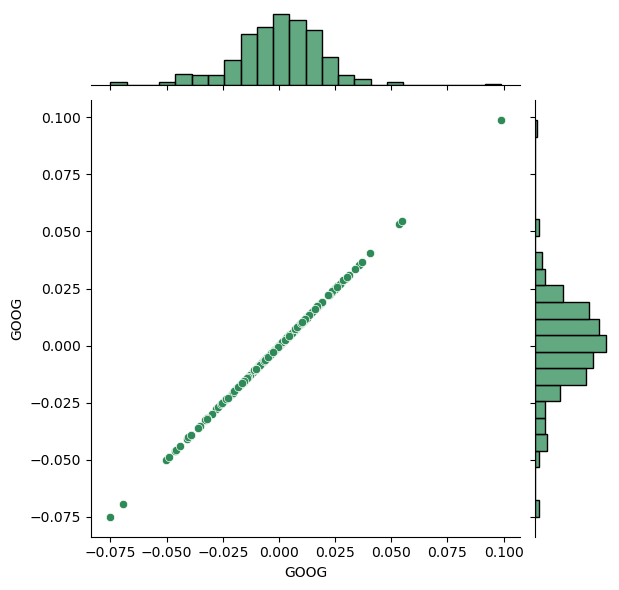

In [70]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

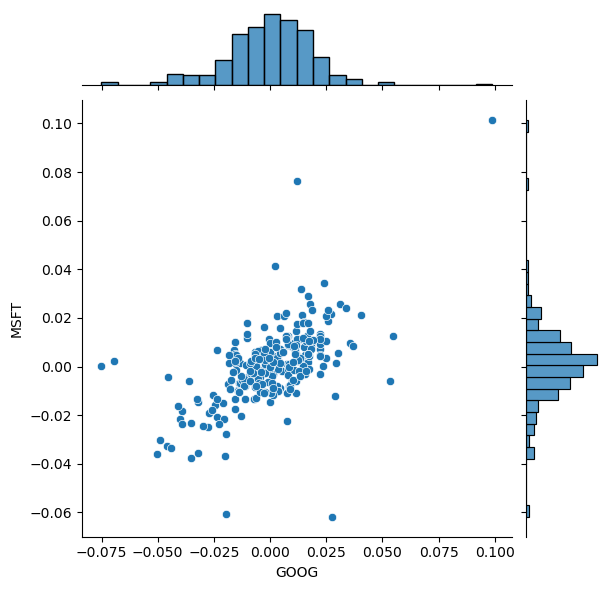

In [71]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

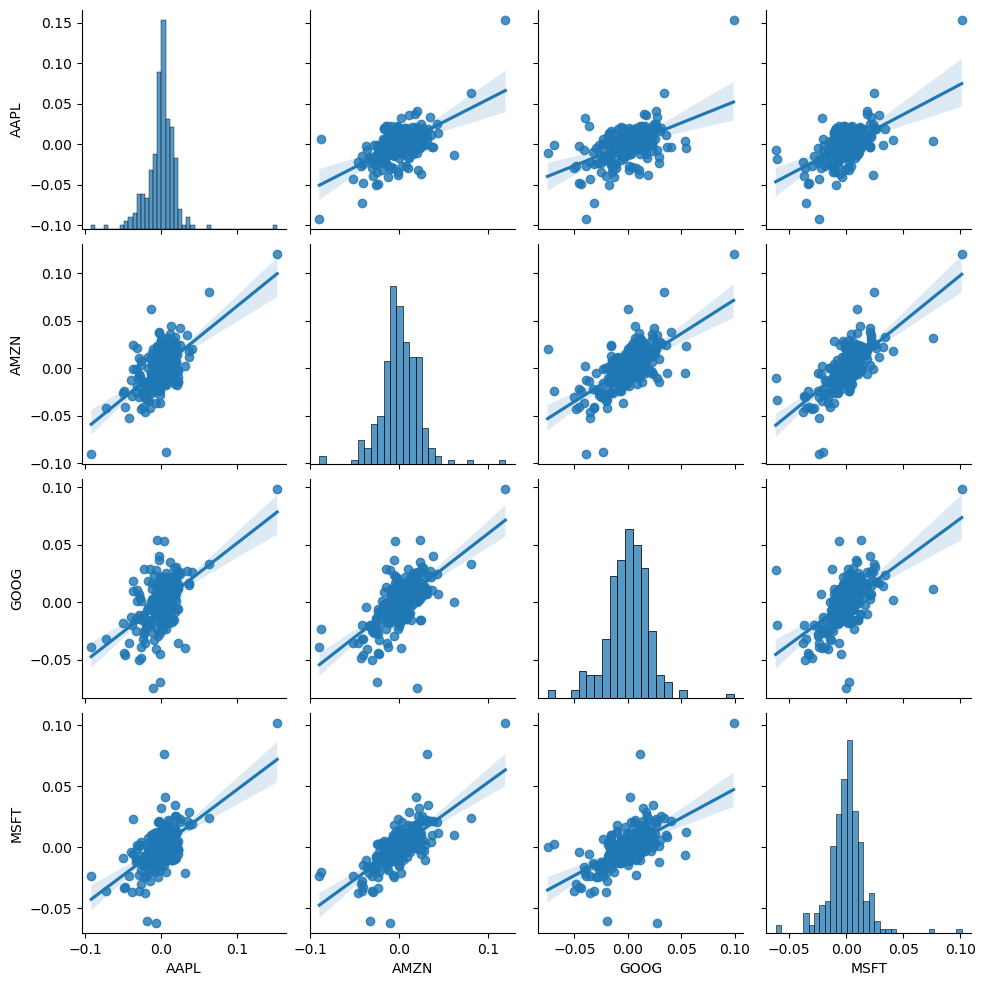

In [72]:
sns.pairplot(tech_rets, kind='reg')

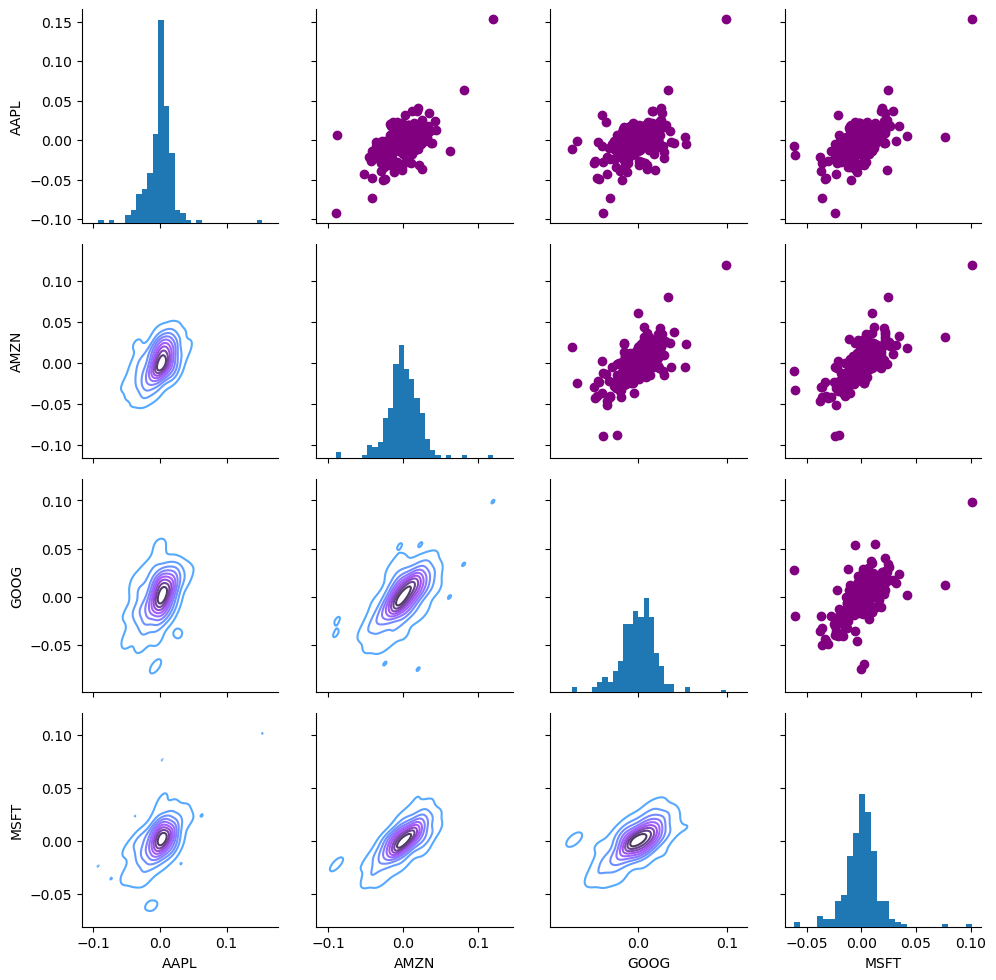

In [73]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

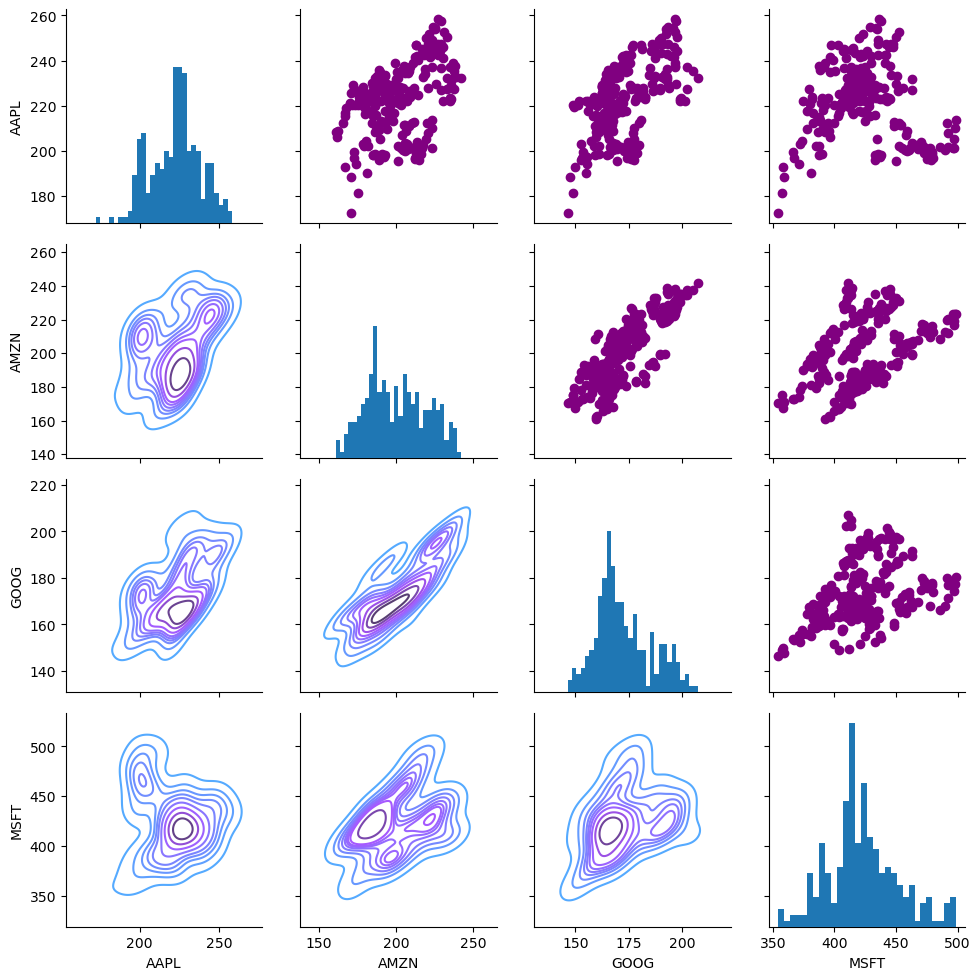

In [74]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

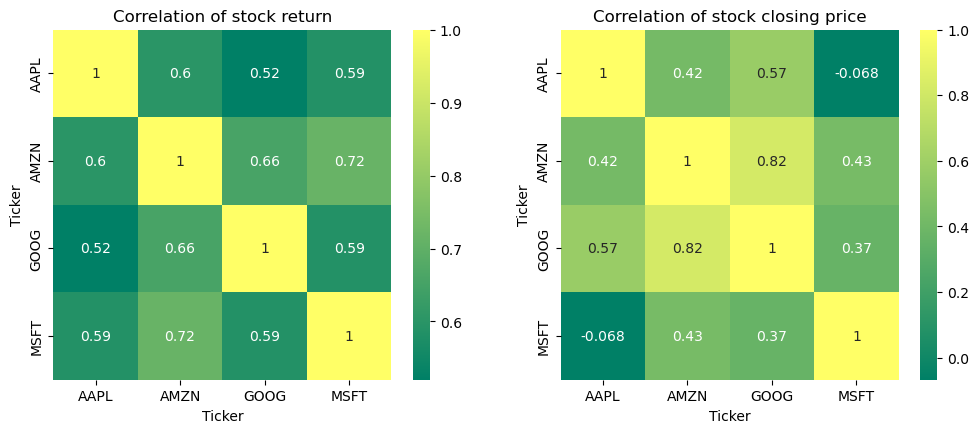

In [75]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

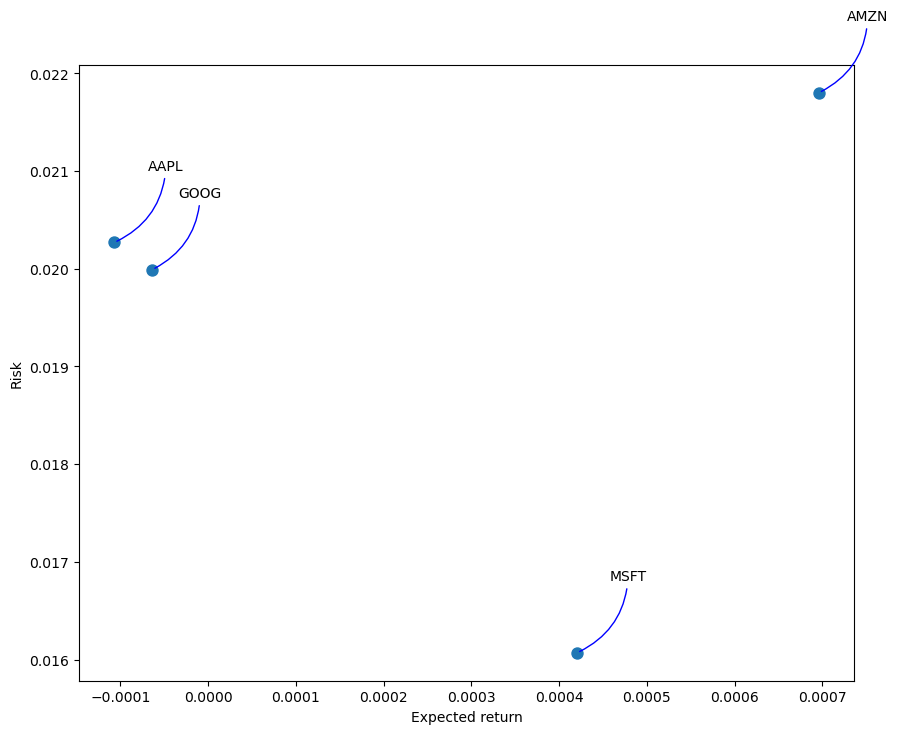

In [76]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [78]:
df = yf.download('AAPL', start='2012-01-01', end=datetime.now(),auto_adjust=False)
df.columns=df.columns.droplevel(1)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03,12.359182,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.425603,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.563552,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.694889,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.674751,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91912800
2025-07-01,207.820007,207.820007,210.190002,206.139999,206.669998,78788900
2025-07-02,212.440002,212.440002,213.339996,208.139999,208.910004,67941800


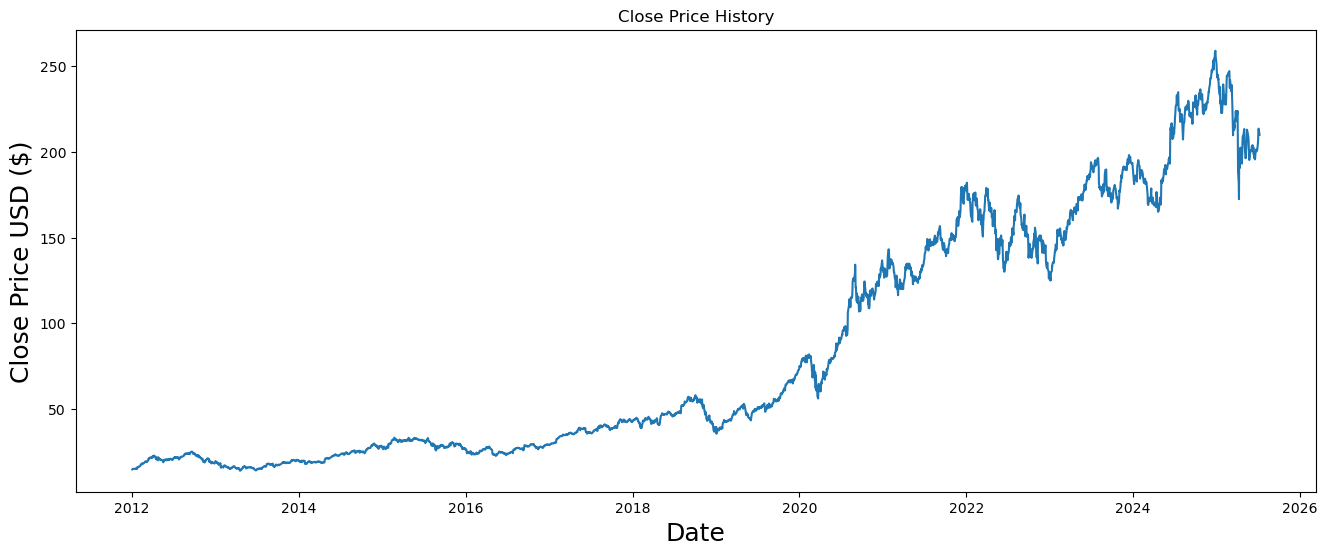

In [79]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [80]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3227

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0030166 ],
       [0.00333866],
       [0.00400756],
       ...,
       [0.80993384],
       [0.81446312],
       [0.79977356]])

In [82]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0030166 , 0.00333866, 0.00400756, 0.0046444 , 0.00454676,
       0.00476681, 0.00466626, 0.00449721, 0.00426696, 0.00497958,
       0.00562224, 0.00542405, 0.00433836, 0.0053745 , 0.0043544 ,
       0.00817979, 0.00788397, 0.00827015, 0.00910518, 0.00961086,
       0.00956859, 0.00941267, 0.01007719, 0.01070237, 0.01141062,
       0.0125546 , 0.01495767, 0.0149941 , 0.0163319 , 0.0173316 ,
       0.01561346, 0.01627507, 0.01626195, 0.01811709, 0.01785332,
       0.01834151, 0.0192188 , 0.019707  , 0.02111329, 0.02213776,
       0.02243359, 0.02253706, 0.0207854 , 0.02036278, 0.02042544,
       0.02207219, 0.02253561, 0.02353094, 0.02587718, 0.02900745,
       0.02842162, 0.02842307, 0.03068626, 0.03139451, 0.03089027,
       0.03042977, 0.02995032, 0.03154314, 0.03263612, 0.03309371])]
[0.03196284432003735]

[array([0.0030166 , 0.00333866, 0.00400756, 0.0046444 , 0.00454676,
       0.00476681, 0.00466626, 0.00449721, 0.00426696, 0.00497958,
       0.00562224, 0.00542405, 0.00

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\satha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3167/3167 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - loss: 0.0014


In [84]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


9.955465154045264

C:\Users\satha\AppData\Local\Temp\ipykernel_27504\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


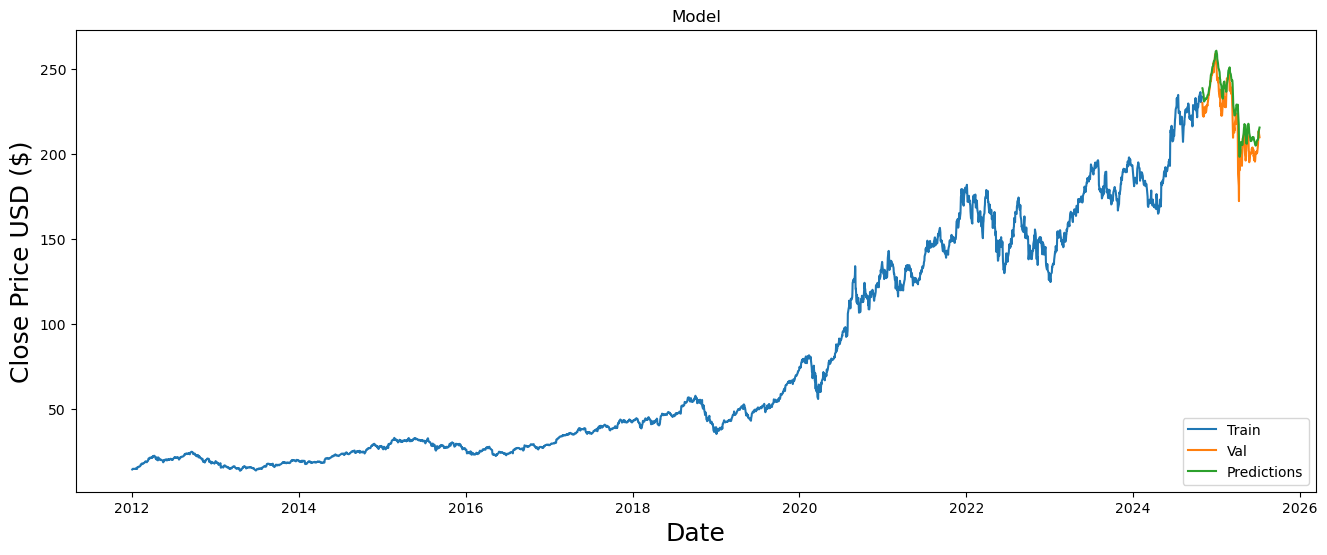

In [85]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [86]:
valid

,Close,Predictions
Date,,
2024-10-30,230.100006,238.734253
2024-10-31,225.910004,238.374252
2024-11-01,222.910004,236.976791
2024-11-04,222.009995,234.911972
2024-11-05,223.449997,232.913055
...,...,...
2025-06-30,205.169998,208.474976
2025-07-01,207.820007,209.382065
2025-07-02,212.440002,210.903610
